# Aula 1
*Murillo Masson Guapo*


---



Objetivo: Fazer uma análise estatística dos textos de Machado de Assis
Esses exercícios devem ser feitos com base no arquivo disponível neste link que contém uma
compilação de textos de alguns romances de Machado de Assis como Dom Casmurro, Memórias
Póstumas de Brás Cubas, A Mão e a Luva, entre outros. Esses textos são de domínio público e estão
disponíveis em diversos sites.

In [1]:
import nltk
nltk.download('punkt')
nltk.download('brown')

!pip install requests


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [2]:
import requests

response = requests.get('https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt')
response.raise_for_status()

text = response.text

for encoding in ['utf-8', 'latin1', 'cp1252']:
    try:
        text = response.content.decode(encoding)
        print(f"Codificação usada: {encoding}")
        print(text[:500])
        break
    except UnicodeDecodeError:
        print(f"Falha ao ler com codificação {encoding}")


Codificação usada: utf-8

Casa Velha

CAPÍTULO PRIMEIRO
ANTES E DEPOIS DA MISSA
Aqui está o que contava, há muitos anos, um velho cônego da Capela
Imperial:
— Não desejo ao meu maior inimigo o que me aconteceu no mês de
abril de 1839. Tinha-me dado na cabeça escrever uma obra política, a
história do reinado de D. Pedro I. Até então esperdiçara algum talento
em décimas e sonetos, muitos artigos de periódicos, e alguns sermões,
que cedia a outros, depois que reconheci que não tinha os dons
indispensáveis ao púlpito. No mê


In [14]:
import re

"""
aqui, ha uma remocao de virgulas como palavras e uma subsequente
transformacao de todos os caracteres para letras minusculas.
nas proximas celulas, essa variavel sera descontinuada
por causar problemas em separar as sentencas do texto
"""

text_clean = re.sub(r'[^\w\s]', '', text).lower()
tokens = nltk.word_tokenize(text_clean, language='portuguese')


1. Quantas palavras há no conjunto da obra?

In [4]:
print(f"Número de palavras: {len(tokens)}")

Número de palavras: 527238


2. Quais as 15 palavras mais frequentes (em ordem)?
o Dica: utilize Counter ou Dicionários


In [15]:
from collections import Counter

word_freq = Counter(tokens)
word_freq.most_common(15)

[('a', 22513),
 ('que', 20164),
 ('de', 17359),
 ('e', 16513),
 ('o', 15056),
 ('não', 11173),
 ('um', 6348),
 ('da', 5908),
 ('do', 5898),
 ('os', 4859),
 ('com', 4642),
 ('se', 4419),
 ('é', 4331),
 ('era', 4248),
 ('mas', 4194)]

3. Qual o bigrama mais frequente?
o Dica: utilize a função ngrams do NLTK


In [6]:
from nltk.util import ngrams

bigrams = ngrams(tokens, 2)
bigram_freq = Counter(bigrams)
most_common_bigram = bigram_freq.most_common(1)

if most_common_bigram:
    bigram, freq = most_common_bigram[0]
    print(f"Bigrama mais frequente: {bigram}")
    print(f"Frequência: {freq}")
else:
    print("Nenhum bigrama encontrado.")

Bigrama mais frequente: ('que', 'a')
Frequência: 1418


4. Quantas palavras distintas há no conjunto da obra?


In [7]:
unique_words = set(tokens)
num_unique_words = len(unique_words)

print(f"Número de palavras distintas: {num_unique_words}")

Número de palavras distintas: 31571


5. Qual o número médio de palavras em uma sentença? Construa o plot da distribuição do
número de palavras por sentença.


In [8]:
"""
aqui foi necessario considerar a versao nao-limpa previamente para poder
tokenizar o texto em sentencas.
tambem transformei todas as palavras das sentenças em minusculas novamente
para ter um match apropriado entre palavras iguais que pontencialmente estejam
em inicio de frase.
"""

text_clean_2 = re.sub(r'\s+', ' ', text)
sentences = nltk.sent_tokenize(text_clean_2, language='portuguese')
sentences = [sentence.lower() for sentence in sentences]
words_per_sentence = [len(nltk.word_tokenize(sentence, language='portuguese')) for sentence in sentences]
mean_words_per_sentence = sum(words_per_sentence) / len(words_per_sentence)

mean_words_per_sentence

18.325200438368807

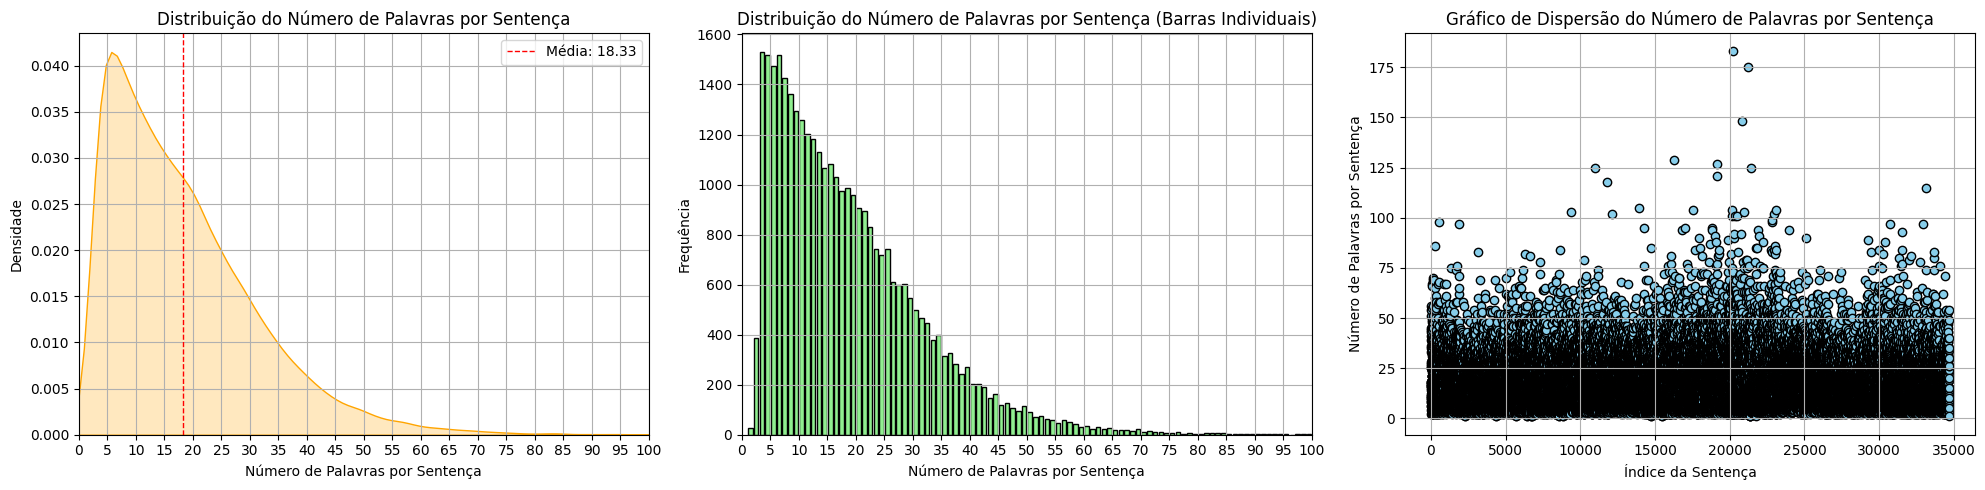

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(words_per_sentence, color='orange', fill=True)
plt.title('Distribuição do Número de Palavras por Sentença')
plt.xlabel('Número de Palavras por Sentença')
plt.ylabel('Densidade')
plt.xlim(0, 100)
plt.axvline(mean_words_per_sentence, color='red', linestyle='dashed', linewidth=1, label=f'Média: {mean_words_per_sentence:.2f}')
plt.legend()
plt.xticks(range(0, 101, 5))
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(words_per_sentence, bins=range(min(words_per_sentence), max(words_per_sentence) + 1), color='lightgreen', edgecolor='black', rwidth=0.8)
plt.title('Distribuição do Número de Palavras por Sentença (Barras Individuais)')
plt.xlabel('Número de Palavras por Sentença')
plt.ylabel('Frequência')
plt.xlim(0, 100)
plt.xticks(range(0, 101, 5))
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(range(len(words_per_sentence)), words_per_sentence, color='skyblue', edgecolor='black')
plt.title('Gráfico de Dispersão do Número de Palavras por Sentença')
plt.xlabel('Índice da Sentença')
plt.ylabel('Número de Palavras por Sentença')
plt.grid(True)

plt.tight_layout()
plt.show()


6. Mostre que a obra de Machado de Assis segue a Lei de Zipf. Construa o plot em escala
logarítmica (log log scale)
o Dica: Dê uma olhada em
https://stats.stackexchange.com/questions/331219/characterizing-fitting-word-countdata-into-zipf-power-law-lognormal


<Figure size 2000x500 with 0 Axes>

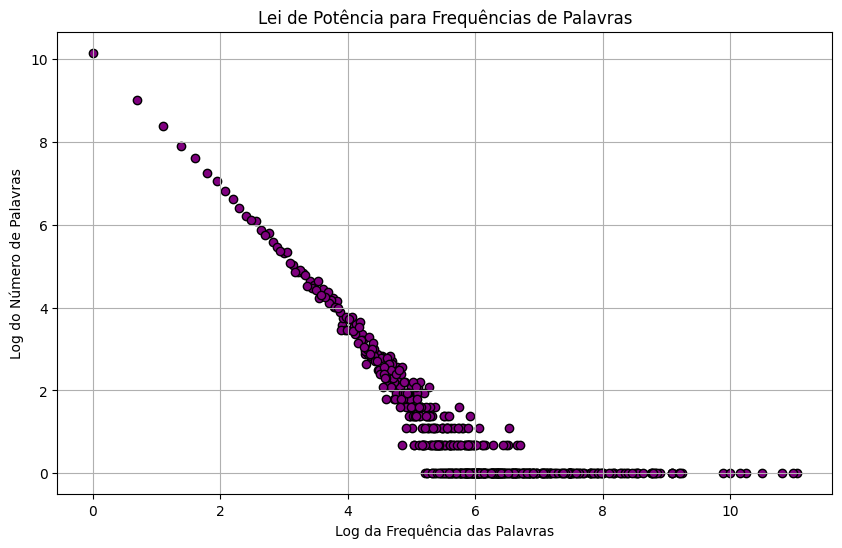

In [11]:
import nltk.corpus
import numpy as np

counter_of_words = Counter(nltk.corpus.brown.words())
counter_of_counts = Counter(counter_of_words.values())
word_counts = np.array(list(counter_of_counts.keys()))
freq_of_word_counts = np.array(list(counter_of_counts.values()))

plt.figure(figsize=(20, 5))

plt.figure(figsize=(10, 6))
plt.scatter(np.log(word_counts), np.log(freq_of_word_counts), color='purple', edgecolor='black')
plt.xlabel('Log da Frequência das Palavras')
plt.ylabel('Log do Número de Palavras')
plt.title('Lei de Potência para Frequências de Palavras')
plt.grid(True)
plt.show()

7. O que você analisou foi um corpus ou um conjunto de dados anotado (dataset) ? Qual a
diferença entre os dois?

**Resposta**: *A análise foi realizada em relação a um Corpus. O Corpus é uma coleção de textos ou transcrições, com ou sem anotações, usada para análises linguísticas. Conjunto de Dados Anotado é um corpus que foi enriquecido com anotações específicas para treinar modelos de aprendizado de máquina em tarefas de PLN.*